In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rasterio
import matplotlib.pyplot as plt
from distmetrics.despeckle import despeckle_one_rtc_arr_with_tv
from distmetrics.nd_tools import get_exterior_nodata_mask

/Users/cmarshak/miniforge3/envs/dist-s1-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with rasterio.open('los-angeles/11SLT/71/2022-12-03/OPERA_L2_RTC-S1_T071-151226-IW2_20221203T135250Z_20250228T122351Z_S1A_30_v1.0_VH.tif') as ds:
    X = ds.read(1)
    p = ds.profile

In [4]:
interp_method = 'bilinear'

In [5]:
em = get_exterior_nodata_mask(X)

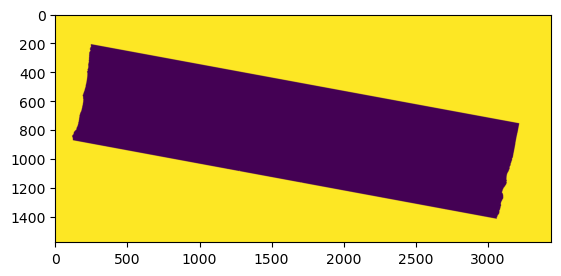

In [6]:
plt.imshow(em)

In [7]:
X_dspkl = despeckle_one_rtc_arr_with_tv(X, interp_method=interp_method, preserve_exterior_mask=True)

In [8]:
with rasterio.open(f'vh_{interp_method}.tif', 'w', **p) as ds:
    ds.write(X_dspkl, 1)

In [9]:
with rasterio.open('VH.tif', 'w', **p) as ds:
    ds.write(X, 1) 

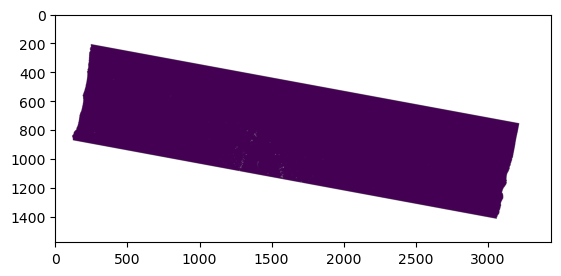

In [10]:
plt.imshow(X)

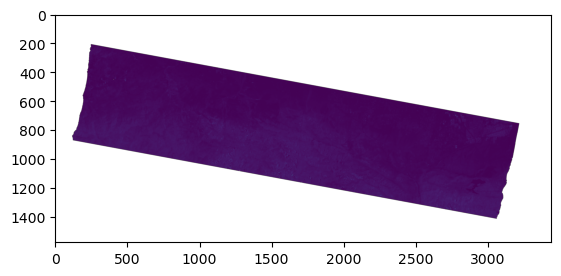

In [11]:
plt.imshow(X_dspkl)

In [28]:
import numpy as np

Y = np.where(np.isnan(X), 0, X)

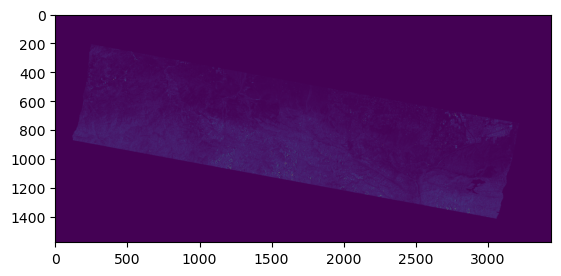

In [29]:
plt.imshow(Y, vmax=.5)

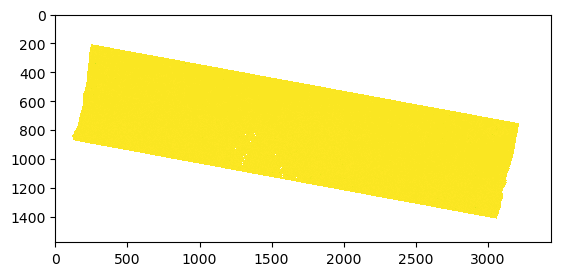

In [12]:
plt.imshow(X_dspkl - X, interpolation='none')